## Libraries


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading


In [ ]:
df = pd.read_csv("../data/salary_labelled_development_set.csv")
df

In [ ]:
# Features: job_id, job_title, job_ad_details, nation_short_desc, salary_additional_text, y_true
repeated_jobs = (
    df["job_id"].value_counts()[df["job_id"].value_counts() > 1].index
)  # job_id with more than one instance
df[df["job_id"].isin(repeated_jobs)].sort_values("job_id")

In [ ]:
df[
    df.duplicated(
        subset=[
            "job_id",
            "job_title",
            "job_ad_details",
            "nation_short_desc",
            "salary_additional_text",
            "y_true",
        ],
        keep=False,
    )
].sort_values(
    "job_id"
)  # job_id with more than one instance and same values

In [ ]:
# We will drop the duplicates, and completely remove the repeated job_id that had different values
df = df.drop_duplicates(
    subset=[
        "job_id",
        "job_title",
        "job_ad_details",
        "nation_short_desc",
        "salary_additional_text",
        "y_true",
    ]
)
df = df.drop_duplicates(subset=["job_id"], keep=False)  # remove all repeated job_id
df

In [12]:
df.duplicated(subset=["job_id"]).sum()  # check if there are any duplicates left

0

In [ ]:
# Check repeated job_ad_details
df[
    df.duplicated(
        subset=[
            "job_ad_details",
        ],
        keep=False,
    )
].sort_values("job_ad_details")

In [14]:
# They seem to be completely repeated but with different job_id
# We'll merge the ones that are the same
df = df.drop_duplicates(
    subset=[
        "job_ad_details",
        "job_title",
        "nation_short_desc",
        "salary_additional_text",
        "y_true",
    ]
)
df.shape

(2228, 6)

In [ ]:
# Check repeated job_ad_details with different data
df[
    df.duplicated(
        subset=[
            "job_ad_details",
        ],
        keep=False,
    )
].groupby("job_ad_details").agg(
    {
        "job_title": lambda x: x.nunique(),
        "nation_short_desc": lambda x: x.nunique(),
        "salary_additional_text": lambda x: x.nunique(),
        "y_true": lambda x: x.nunique(),
    }
).reset_index().sort_values(
    "job_ad_details"
)

In [ ]:
# All are differences on the job_title, and one on the salary_additional_text
# We will take a look at the job_title
df[
    df.duplicated(
        subset=[
            "job_ad_details",
        ],
        keep=False,
    )
].drop(
    columns=["job_id"]
).groupby("job_ad_details").agg(
    {"job_title": lambda x: x.unique()}
).reset_index().sort_values(
    "job_ad_details"
)

In [17]:
# They all are the same job ad, but for different locations, so the information is the same
# We will drop the duplicates
df = df.drop_duplicates(subset=["job_ad_details"])
df.shape

(2208, 6)

In [18]:
# Study y_true
df["y_true"].value_counts()

y_true
0-0-None-None              939
1500-1500-MYR-MONTHLY       46
16000-16000-PHP-MONTHLY     25
17500-17500-PHP-MONTHLY     24
25000-25000-PHP-MONTHLY     18
                          ... 
1700-2000-MYR-MONTHLY        1
100-150-MYR-DAILY            1
89598-94514-AUD-ANNUAL       1
51-53-NZD-HOURLY             1
81581-108532-AUD-ANNUAL      1
Name: count, Length: 732, dtype: int64

In [19]:
y_data = df["y_true"].str.split("-", expand=True)
y_data.columns = ["min_salary", "max_salary", "currency", "frequency"]
y_data = y_data.astype({"min_salary": "float", "max_salary": "float"})
y_data

,min_salary,max_salary,currency,frequency
0,17500.0,17500.0,PHP,MONTHLY
1,16000.0,16000.0,PHP,MONTHLY
2,0.0,0.0,None,None
3,0.0,0.0,None,None
4,0.0,0.0,None,None
...,...,...,...,...
2262,0.0,0.0,None,None
2263,0.0,0.0,None,None
2264,0.0,0.0,None,None
2265,2500.0,3000.0,SGD,MONTHLY


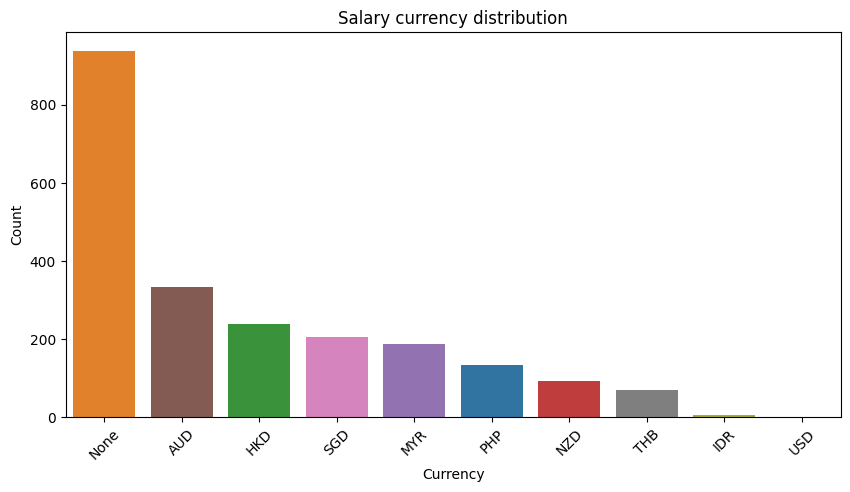

In [20]:
# Let's examine the currency
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    data=y_data,
    x="currency",
    ax=ax,
    order=y_data["currency"].value_counts().index,
    hue="currency",
)
ax.set_title("Salary currency distribution")
ax.set_xlabel("Currency")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.show()

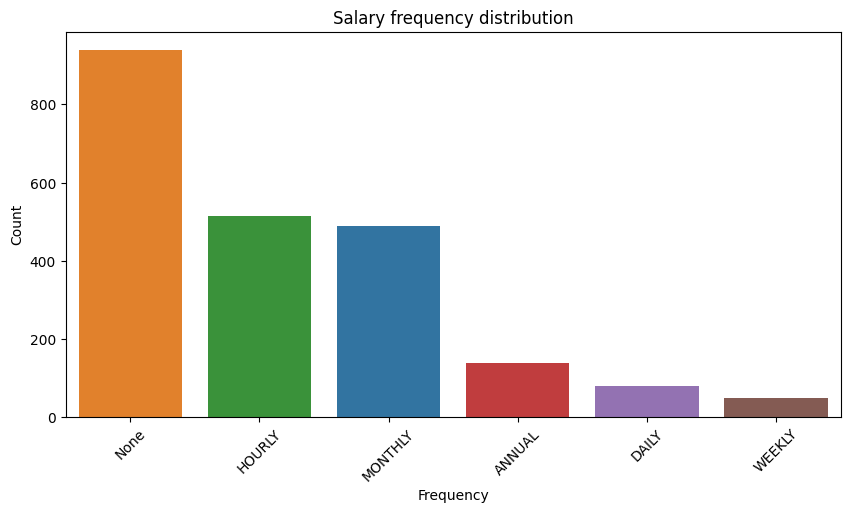

In [21]:
# It seems like the data is from job offerings in the Asia-Pacific region
# Now we'll examine the frequency
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    data=y_data,
    x="frequency",
    ax=ax,
    order=y_data["frequency"].value_counts().index,
    hue="frequency",
)
ax.set_title("Salary frequency distribution")
ax.set_xlabel("Frequency")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.show()

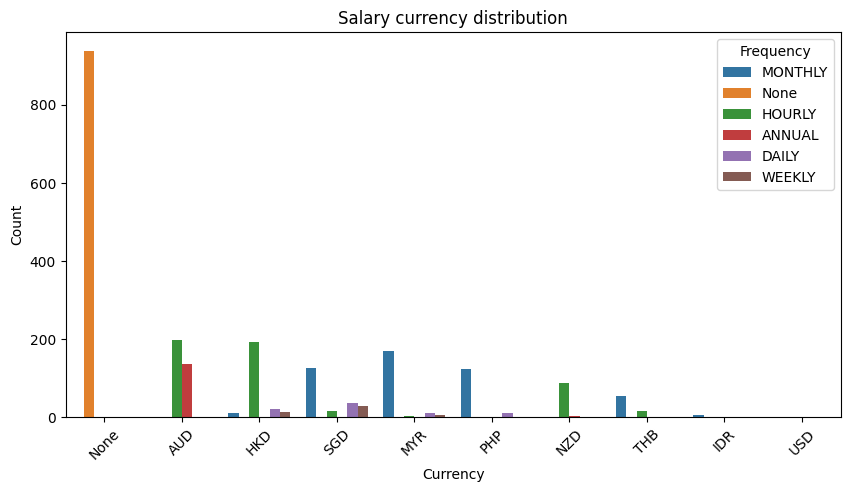

In [22]:
# We will check frequency compared to currency
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(
    data=y_data,
    x="currency",
    ax=ax,
    order=y_data["currency"].value_counts().index,
    hue="frequency",
)
ax.set_title("Salary currency distribution")
ax.set_xlabel("Currency")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Frequency")
plt.show()

In [23]:
# Check a data point with y_true none
df[df["y_true"] == "0-0-None-None"]

,job_id,job_title,job_ad_details,nation_short_desc,salary_additional_text,y_true
2,55838599,Production Staff Required - Afternoon & Night-...,<p>Original Foods Baking Co. is one of New Zea...,NZ,NaN,0-0-None-None
3,64369104,Payer Analyst,<div> </div><div> </div>The Payer Analyst indi...,PH,-,0-0-None-None
4,54861511,"Solicitor, Restructuring (ID: 2100013K)",<p>The DLA Piper team operates across more tha...,AUS,NaN,0-0-None-None
6,74982893,Key Account Manager,<p>This role will contribute to expand our cli...,ID,"Car allowance, healthcare, annual bonus",0-0-None-None
13,63628834,People Data Analyst,<div> </div><div> </div><strong>About us</stro...,PH,-,0-0-None-None
...,...,...,...,...,...,...
2260,51241917,Senior Investment Accountant,<p>Allianz is the home for Accountants who dar...,AUS,Competitive salary plus benefits,0-0-None-None
2262,75640730,"Senior Manager, Process Excellence and Transfo...",<p>Our client is a well-established consumer g...,HK,NaN,0-0-None-None
2263,77931852,Accounting Manager - Hotel Business (Nakhon Ra...,<p> </p><p><strong>Position:</strong> Accounti...,TH,NaN,0-0-None-None
2264,54359262,Technical Operator - Audio Visual,<p><strong>Your mission: To create memorable e...,AUS,NaN,0-0-None-None


In [ ]:
df["salary_additional_text"].isnull().sum() / df.shape[
    0
]  # check if there are any null values

0.5701992753623188

In [27]:
df[df["y_true"] == "0-0-None-None"].shape[0] / df.shape[0]

0.42527173913043476

In [28]:
df[df["y_true"] == "0-0-None-None"].isnull().sum() / df.shape[
    0
]  # check if there are any null values

job_id                    0.000000
job_title                 0.000000
job_ad_details            0.000000
nation_short_desc         0.000000
salary_additional_text    0.241848
y_true                    0.000000
dtype: float64